# Welcome to my third personal project. In this notebook, we will use a dataset from Kaggle that includes over 70,000 reviews from 1,000 different products provided by Datafinit' Product Database. We will try to predict review ratings using user-generated reviews.

### Let's first import the basic libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Let's import the csv file and get a glimpse of the dataset.

In [2]:
df = pd.read_csv("C:/Users/Richard Cheung/Desktop/Personal Projects/Personal Project III/grammar-and-online-product-reviews/GrammarandProductReviews.csv")
print(df.shape)
df.head()

(71044, 25)


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,113026909.0,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,171267657.0,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
id                      71044 non-null object
brand                   71044 non-null object
categories              71044 non-null object
dateAdded               71044 non-null object
dateUpdated             71044 non-null object
ean                     39065 non-null object
keys                    71044 non-null object
manufacturer            70903 non-null object
manufacturerNumber      70841 non-null object
name                    71044 non-null object
reviews.date            70977 non-null object
reviews.dateAdded       71044 non-null object
reviews.dateSeen        71044 non-null object
reviews.didPurchase     32158 non-null object
reviews.doRecommend     60429 non-null object
reviews.id              32158 non-null float64
reviews.numHelpful      32508 non-null float64
reviews.rating          71044 non-null int64
reviews.sourceURLs      71044 non-null object
reviews.text    

### Apparently not all transactions have reviews. We will drop the ones without reviews later on.

In [4]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,3.215800e+04,32508.000000,71044.000000
mean,7.944753e+07,0.410422,4.385747
std,4.842696e+07,3.574442,1.067659
min,2.187400e+04,0.000000,1.000000
25%,3.355342e+07,0.000000,4.000000
50%,7.124763e+07,0.000000,5.000000
75%,1.112628e+08,0.000000,5.000000
max,1.038227e+09,183.000000,5.000000


### Let's take at the distribution of the review ratings.

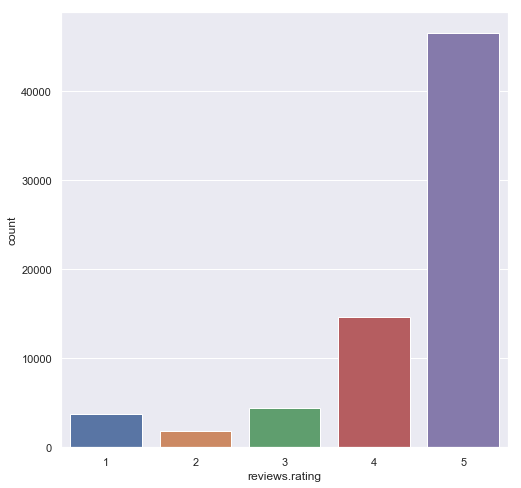

In [5]:
plt.figure(figsize = (8 ,8))
sns.set(style = 'darkgrid')
ax = sns.countplot(x = df['reviews.rating'],
                   data = df)

### Many users rated their products with a 5-star rating

### I would like to do an exploratory analysis on categories and brands, but the names of the categories are very long which is inconvenient for me to present their names on graphs. Therefore, I decided to shorten the categories names to just the text before the first comma

In [6]:
df['categories'] = df['categories'].apply(lambda x: x.split(',')[0])
df['categories'].unique()

array(['Movies', 'Food', 'Personal Care', 'Household Essentials', 'Home',
       'Gift Finder', 'Household Chemicals', 'Movies & TV Shows',
       'Furniture', 'Home Improvement', 'Holiday Shop', 'Party Supplies',
       'Food & Beverage', 'School & Office Supplies', 'Sports & Outdoors',
       'Health', 'Pro Audio', 'Auto & Tires', 'Office',
       'Kitchen & Dining', 'Baby', 'Featured Brands', 'Party & Occasions',
       'Patio & Garden', 'Clothing', 'Music on CD or Vinyl', 'Beauty',
       'Video Games', 'Pets', 'Brand Shop', 'Accessories', "Kids' Rooms",
       'Photography', 'Mobile', 'Electronics',
       'Musical Instruments & Karaoke'], dtype=object)

In [7]:
df['categories'].value_counts()

Movies                           17227
Household Essentials             16368
Personal Care                    14141
Featured Brands                   5623
Household Chemicals               4658
Beauty                            3479
Food                              2325
Movies & TV Shows                 2160
Home                              1135
Kitchen & Dining                   831
School & Office Supplies           506
Food & Beverage                    446
Music on CD or Vinyl               418
Electronics                        359
Mobile                             328
Office                             315
Baby                               293
Home Improvement                   127
Health                              86
Auto & Tires                        49
Furniture                           38
Holiday Shop                        31
Sports & Outdoors                   22
Gift Finder                         20
Brand Shop                          12
Video Games              

### The top 3 most reviews categories are Movies, Household Essentials, and Personal Care. Let's visualize the review counts on a graph.

Text(0.5,1,'Categories - Reviews Counts')

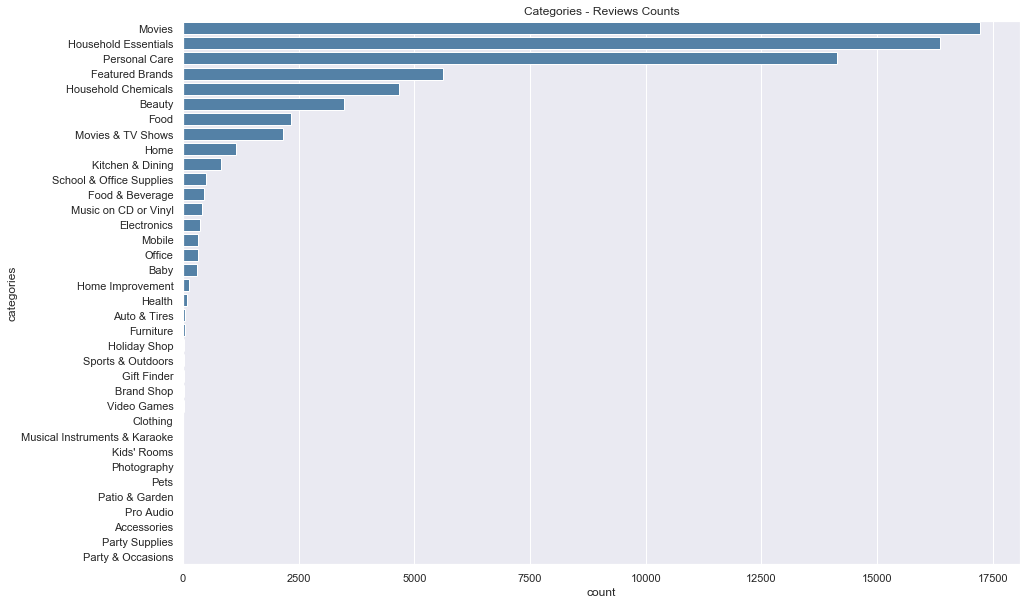

In [8]:
# Most purchased categories
plt.figure(figsize = (15, 10))
ax = sns.countplot(y = df['categories'],
                   data  = df,
                   color = 'steelblue',
                   order = df['categories'].value_counts().index)
ax.set_title('Categories - Reviews Counts')

### Now I would like to look at the average ratings for each category and brand.

### We will begin by performing a Groupby function on the dataframe which will create a separate dataframe. Then we will merge the second dataframe into the original dataframe to visualize the result.

In [9]:
df2 = df.groupby(['categories'])['reviews.rating'].agg(['mean']).reset_index()
df2.head()

,categories,mean
0,Accessories,5.000000
1,Auto & Tires,4.775510
2,Baby,4.238908
3,Beauty,4.427134
4,Brand Shop,4.750000


In [10]:
df = df.merge(df2,
              on = 'categories',
              how = 'left')
print(df.shape)
df.head()

(71044, 26)


,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,mean
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Movies,2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,4.422534
1,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,4.561720
2,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,4.561720
3,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,4.081960
4,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,NaN,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427,4.081960


In [11]:
df2 = df.groupby(['brand'])['reviews.rating'].agg(['mean']).reset_index()
df2.head()

,brand,mean
0,4C Foods,5.000000
1,AMBI,4.750000
2,ANCHOR BAY,4.766667
3,Adesso,5.000000
4,Advantage,4.000000


In [12]:
df = df.merge(df2,
              on = 'brand',
              how = 'left')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,mean_x,mean_y
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Movies,2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,4.422534,4.628571
1,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300
2,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300
3,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,4.081960,2.518519
4,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427,4.081960,2.518519


In [13]:
df = df.rename(columns = {'mean_x': 'cat_avg_rating',
                          'mean_y': 'brand_avg_rating'})
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,cat_avg_rating,brand_avg_rating
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Movies,2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,4.422534,4.628571
1,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300
2,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300
3,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,4.081960,2.518519
4,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,1,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427,4.081960,2.518519


In [14]:
df2 = df.groupby(['categories'])['categories'].agg(['count']).reset_index()
df2.head()

,categories,count
0,Accessories,2
1,Auto & Tires,49
2,Baby,293
3,Beauty,3479
4,Brand Shop,12


In [15]:
df = df.merge(df2,
              on = 'categories',
              how = 'left')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,cat_avg_rating,brand_avg_rating,count
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Movies,2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,4.422534,4.628571,17227
1,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300,2325
2,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300,2325
3,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,https://www.walmart.com/reviews/product/43383370,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,4.081960,2.518519,14141
4,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,https://www.walmart.com/reviews/product/43383370,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427,4.081960,2.518519,14141


In [16]:
df2 = df.groupby(['brand'])['brand'].agg(['count']).reset_index()
df2.head()

,brand,count
0,4C Foods,6
1,AMBI,4
2,ANCHOR BAY,30
3,Adesso,2
4,Advantage,3


In [17]:
df = df.merge(df2,
              on = 'brand',
              how = 'left')
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,cat_avg_rating,brand_avg_rating,count_x,count_y
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Movies,2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,4.422534,4.628571,17227,35
1,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300,2325,426
2,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300,2325,426
3,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,4.081960,2.518519,14141,27
4,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427,4.081960,2.518519,14141,27


In [18]:
df = df.rename(columns = {'count_x': 'cat_count',
                          'count_y': 'brand_count'})
df.head()

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,...,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,cat_avg_rating,brand_avg_rating,cat_count,brand_count
0,AV13O1A8GV-KLJ3akUyj,Universal Music,Movies,2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,4.422534,4.628571,17227,35
1,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300,2325,426
2,AV14LG0R-jtxr-f38QfS,Lundberg,Food,2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,...,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,4.561720,4.772300,2325,426
3,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,I read through the reviews on here before look...,Disappointed,NaN,NaN,Rebecca,67981934427,4.081960,2.518519,14141,27
4,AV16khLE-jtxr-f38VFn,K-Y,Personal Care,2017-07-25T16:26:19Z,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,K-Y Love Sensuality Pleasure Gel,...,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,Walker557,67981934427,4.081960,2.518519,14141,27


In [19]:
df['categories'].value_counts()

Movies                           17227
Household Essentials             16368
Personal Care                    14141
Featured Brands                   5623
Household Chemicals               4658
Beauty                            3479
Food                              2325
Movies & TV Shows                 2160
Home                              1135
Kitchen & Dining                   831
School & Office Supplies           506
Food & Beverage                    446
Music on CD or Vinyl               418
Electronics                        359
Mobile                             328
Office                             315
Baby                               293
Home Improvement                   127
Health                              86
Auto & Tires                        49
Furniture                           38
Holiday Shop                        31
Sports & Outdoors                   22
Gift Finder                         20
Brand Shop                          12
Video Games              

### Some categories have a low number of reviews. I will set the cutoff value at 100 review counts for the categories.

In [20]:
df_2 = df[df['cat_count'] > 100]
df_2['categories'].value_counts()
df_2['cat_avg_rating'].unique()

array([4.42253439, 4.56172043, 4.08196026, 4.37469453, 4.35418502,
       4.67689996, 4.54814815, 4.34645669, 4.65695067, 4.32806324,
       4.88571429, 4.3345367 , 4.23890785, 4.68326516, 4.68899522,
       4.42713423, 3.75914634, 4.14763231])

### Okay, let's plot the numbers on a bar chart.

C:\Users\Richard Cheung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Most Reviewed Categories - Average Rating')

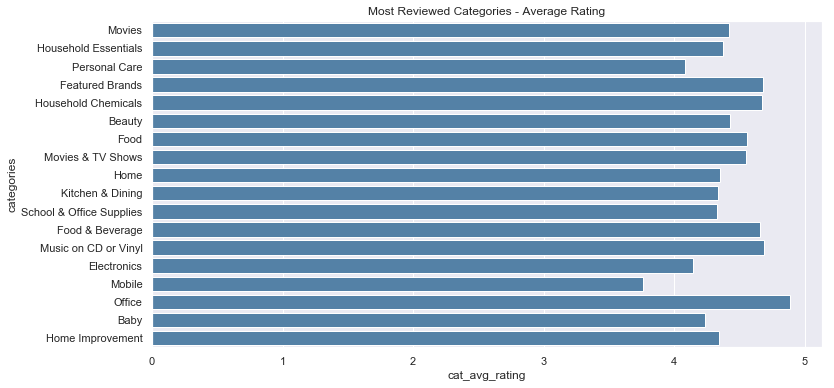

In [21]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = df_2['cat_avg_rating'],
                 y = df_2['categories'],
                 data  = df_2,
                 order = df_2['categories'].value_counts().index,
                 color = 'steelblue')
ax.set_title('Most Reviewed Categories - Average Rating')

### Office products has the highest average review ratings at 4.89 while Mobile products has the lowest average reivew ratings at 3.76 among the selected categories.

In [22]:
df['brand'].value_counts()

Clorox                            10700
Universal Home Video               6178
Tide                               5384
FOX                                4498
Disney                             3692
Olay                               3420
Warner Home Video                  3330
L'Oreal Paris                      2683
L'oreal Paris                      2288
Sony Pictures                      2161
Rubbermaid                         1939
Warner Bros.                       1920
Quilted Northern                   1439
Lionsgate                          1351
Burt's Bees                         965
Summit Entertainment                821
Nexxus                              773
Maybelline                          742
Pantene                             655
Foodsaver                           587
Head & Shoulders                    565
Kiss                                562
Aveeno                              442
Lundberg                            426
Lemi Shine                          423


### Again, some brands have really low numbers of reviews. I will set the cutoff value at 1000 review counts for the brands.

In [23]:
df_3 = df[df['brand_count'] > 1000]
df_3['brand'].value_counts()

Clorox                  10700
Universal Home Video     6178
Tide                     5384
FOX                      4498
Disney                   3692
Olay                     3420
Warner Home Video        3330
L'Oreal Paris            2683
L'oreal Paris            2288
Sony Pictures            2161
Rubbermaid               1939
Warner Bros.             1920
Quilted Northern         1439
Lionsgate                1351
Name: brand, dtype: int64

In [24]:
df_3.loc[df_3['brand'] == "L'oreal Paris", 'brand'] = "L'Oreal Paris"

C:\Users\Richard Cheung\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


C:\Users\Richard Cheung\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Most Reviewed Brands - Average Rating')

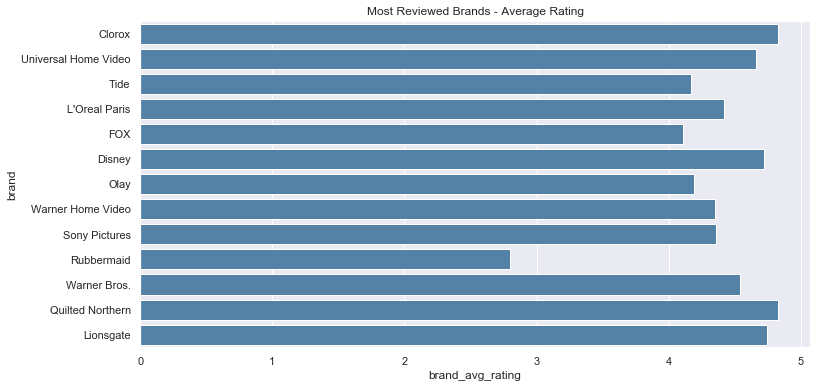

In [25]:
plt.figure(figsize = (12, 6))
ax = sns.barplot(x = df_3['brand_avg_rating'],
                 y = df_3['brand'],
                 data  = df_3,
                 order = df_3['brand'].value_counts().index,
                 color = 'steelblue')
ax.set_title('Most Reviewed Brands - Average Rating')

### Clorox products has the most review counts and the highest average review rating

### Now I would like to see which category and brand have the highest number of 5-star ratings.

In [26]:
df.loc[df['reviews.rating'] == 5, 'categories'].value_counts()

Household Essentials             11766
Movies                           10219
Personal Care                     8136
Featured Brands                   4165
Household Chemicals               3634
Beauty                            2101
Food                              1802
Movies & TV Shows                 1424
Home                               754
Kitchen & Dining                   574
Food & Beverage                    362
Music on CD or Vinyl               326
Office                             285
School & Office Supplies           242
Electronics                        182
Baby                               161
Mobile                             126
Home Improvement                    83
Health                              58
Auto & Tires                        42
Furniture                           24
Gift Finder                         17
Holiday Shop                        13
Sports & Outdoors                   12
Brand Shop                          10
Clothing                 

Text(0.5,1,'Categories with the Most 5-Star Rating')

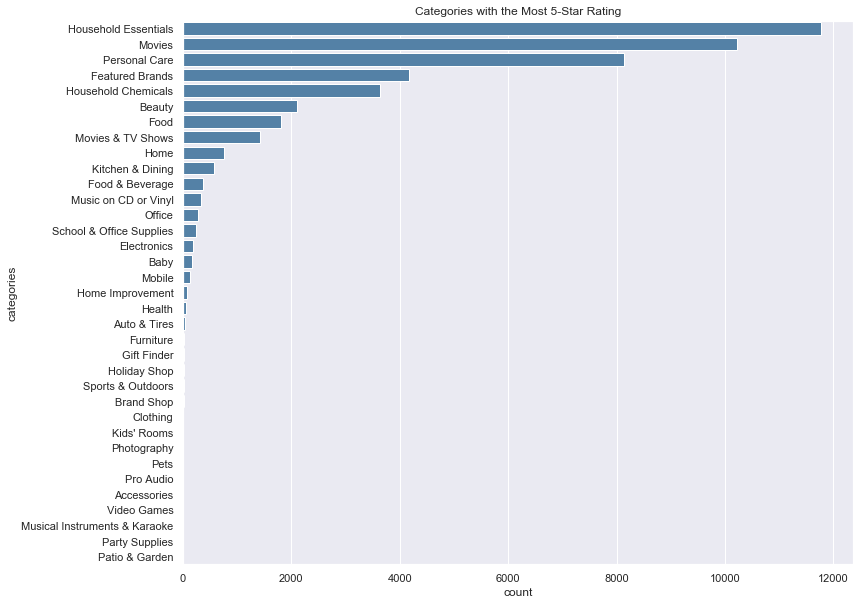

In [27]:
plt.figure(figsize = (12, 10))
ax = sns.countplot(y = df.loc[df['reviews.rating'] == 5, 'categories'],
                   data = df,
                   order = df.loc[df['reviews.rating'] == 5, 'categories'].value_counts().index,
                   color = 'steelblue')
ax.set_title('Categories with the Most 5-Star Rating')

### Household Essentials category tops the list!

In [28]:
df_3.loc[df_3['reviews.rating'] == 5, 'brand'].value_counts()

Clorox                  9030
Universal Home Video    4510
Tide                    3358
L'Oreal Paris           3094
Disney                  2819
FOX                     1884
Olay                    1779
Warner Home Video       1741
Quilted Northern        1280
Sony Pictures           1262
Warner Bros.            1249
Lionsgate               1075
Rubbermaid               544
Name: brand, dtype: int64

Text(0.5,1,'Brands with the Most 5-Star Rating')

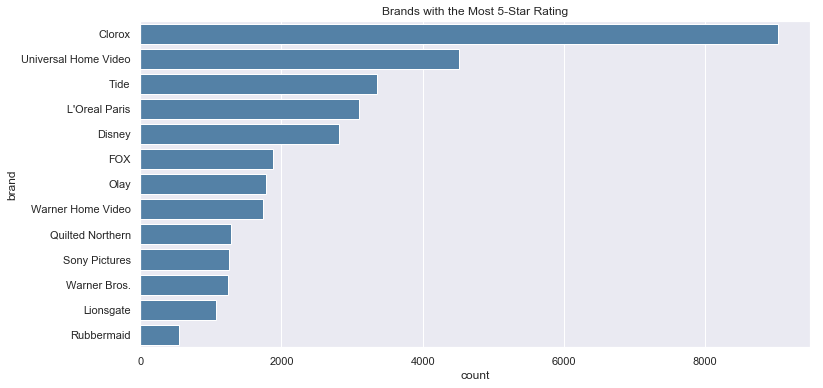

In [29]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(y = df_3.loc[df_3['reviews.rating'] == 5, 'brand'],
                   data = df_3,
                   order = df_3.loc[df_3['reviews.rating'] == 5, 'brand'].value_counts().index,
                   color = 'steelblue')
ax.set_title('Brands with the Most 5-Star Rating')

### Clorox seems to have a really good product quality and customer base!

### Now we are at the core of this project which is to use the review text to predict review rating. We will first use the NLTK library to filter out the stopwords in the review text and then we will use Wordloud to show the term frequency of each word.

In [30]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
import re

### Let's only keep the transactions that have review texts.

In [31]:
df = df.loc[df['reviews.text'].isnull() == False]
df.shape

(71008, 29)

In [32]:
def wc(data, bgcolor, title):
    fig = plt.figure(figsize = (8, 5), dpi = 80)
    wc = WordCloud(background_color = bgcolor,
                   max_words = 1000,
                   max_font_size = 50)
    wc.generate(' '.join(data))
    fig.suptitle(title, fontsize = 16)
    fig.subplots_adjust(top=1)
    plt.imshow(wc)
    plt.axis('off')

### This is to strength our dictionary of stopwords

In [33]:
stopwords_json = {"en":["a","a's","able","about","above","according","accordingly","across","actually","after","afterwards","again","against","ain't","all","allow","allows","almost","alone","along","already","also","although","always","am","among","amongst","an","and","another","any","anybody","anyhow","anyone","anything","anyway","anyways","anywhere","apart","appear","appreciate","appropriate","are","aren't","around","as","aside","ask","asking","associated","at","available","away","awfully","b","be","became","because","become","becomes","becoming","been","before","beforehand","behind","being","believe","below","beside","besides","best","better","between","beyond","both","brief","but","by","c","c'mon","c's","came","can","can't","cannot","cant","cause","causes","certain","certainly","changes","clearly","co","com","come","comes","concerning","consequently","consider","considering","contain","containing","contains","corresponding","could","couldn't","course","currently","d","definitely","described","despite","did","didn't","different","do","does","doesn't","doing","don't","done","down","downwards","during","e","each","edu","eg","eight","either","else","elsewhere","enough","entirely","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","exactly","example","except","f","far","few","fifth","first","five","followed","following","follows","for","former","formerly","forth","four","from","further","furthermore","g","get","gets","getting","given","gives","go","goes","going","gone","got","gotten","greetings","h","had","hadn't","happens","hardly","has","hasn't","have","haven't","having","he","he's","hello","help","hence","her","here","here's","hereafter","hereby","herein","hereupon","hers","herself","hi","him","himself","his","hither","hopefully","how","howbeit","however","i","i'd","i'll","i'm","i've","ie","if","ignored","immediate","in","inasmuch","inc","indeed","indicate","indicated","indicates","inner","insofar","instead","into","inward","is","isn't","it","it'd","it'll","it's","its","itself","j","just","k","keep","keeps","kept","know","known","knows","l","last","lately","later","latter","latterly","least","less","lest","let","let's","like","liked","likely","little","look","looking","looks","ltd","m","mainly","many","may","maybe","me","mean","meanwhile","merely","might","more","moreover","most","mostly","much","must","my","myself","n","name","namely","nd","near","nearly","necessary","need","needs","neither","never","nevertheless","new","next","nine","no","nobody","non","none","noone","nor","normally","not","nothing","novel","now","nowhere","o","obviously","of","off","often","oh","ok","okay","old","on","once","one","ones","only","onto","or","other","others","otherwise","ought","our","ours","ourselves","out","outside","over","overall","own","p","particular","particularly","per","perhaps","placed","please","plus","possible","presumably","probably","provides","q","que","quite","qv","r","rather","rd","re","really","reasonably","regarding","regardless","regards","relatively","respectively","right","s","said","same","saw","say","saying","says","second","secondly","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sensible","sent","serious","seriously","seven","several","shall","she","should","shouldn't","since","six","so","some","somebody","somehow","someone","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specified","specify","specifying","still","sub","such","sup","sure","t","t's","take","taken","tell","tends","th","than","thank","thanks","thanx","that","that's","thats","the","their","theirs","them","themselves","then","thence","there","there's","thereafter","thereby","therefore","therein","theres","thereupon","these","they","they'd","they'll","they're","they've","think","third","this","thorough","thoroughly","those","though","three","through","throughout","thru","thus","to","together","too","took","toward","towards","tried","tries","truly","try","trying","twice","two","u","un","under","unfortunately","unless","unlikely","until","unto","up","upon","us","use","used","useful","uses","using","usually","uucp","v","value","various","very","via","viz","vs","w","want","wants","was","wasn't","way","we","we'd","we'll","we're","we've","welcome","well","went","were","weren't","what","what's","whatever","when","whence","whenever","where","where's","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","who's","whoever","whole","whom","whose","why","will","willing","wish","with","within","without","won't","wonder","would","wouldn't","x","y","yes","yet","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","z","zero"]}

In [34]:
def word_freq(df):

    top_N = 100

    a = df.str.lower().str.cat(sep=' ')

    b = re.sub('[^A-Za-z]+', ' ', a)

    stop_words = list(get_stop_words('en'))
    nltk_words = list(stopwords.words('english'))
    stopwords_json_en = list(stopwords_json['en'])
    stop_words.extend(nltk_words)
    stop_words.extend(stopwords_json_en)

    word_tokens = word_tokenize(b)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    without_single_chr = [word for word in filtered_sentence if len(word) > 2]

    cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]

    word_dist = nltk.FreqDist(cleaned_data_title)
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                        columns = ['Word', 'Frequency'])

    plt.figure(figsize = (10, 10))
    ax = sns.barplot(x = "Frequency",
                     y = "Word",
                     data = rslt.head(10),
                     palette = sns.color_palette(palette = 'Set2'))

### Now we will visualize term frequency for each rating threshold from 1 to 5.

In [35]:
df_1 = df[df['reviews.rating'] == 1]['reviews.text']
df_2 = df[df['reviews.rating'] == 2]['reviews.text']
df_3 = df[df['reviews.rating'] == 3]['reviews.text']
df_4 = df[df['reviews.rating'] == 4]['reviews.text']
df_5 = df[df['reviews.rating'] == 5]['reviews.text']
print(df_1.shape,
      df_2.shape,
      df_3.shape,
      df_4.shape,
      df_5.shape)

(3701,) (1832,) (4367,) (14592,) (46516,)


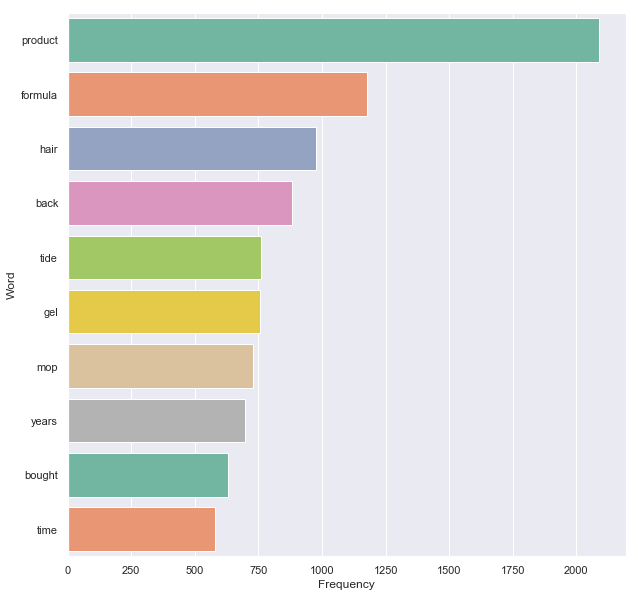

In [36]:
word_freq(df_1)

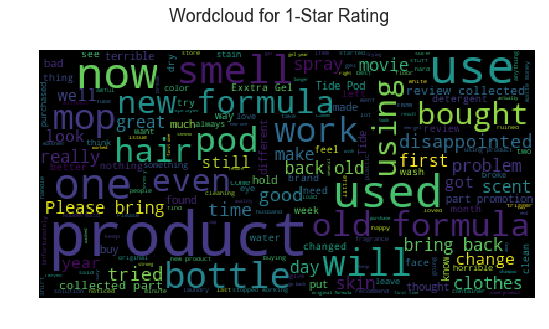

In [37]:
wc(df_1, 'black', 'Wordcloud for 1-Star Rating')

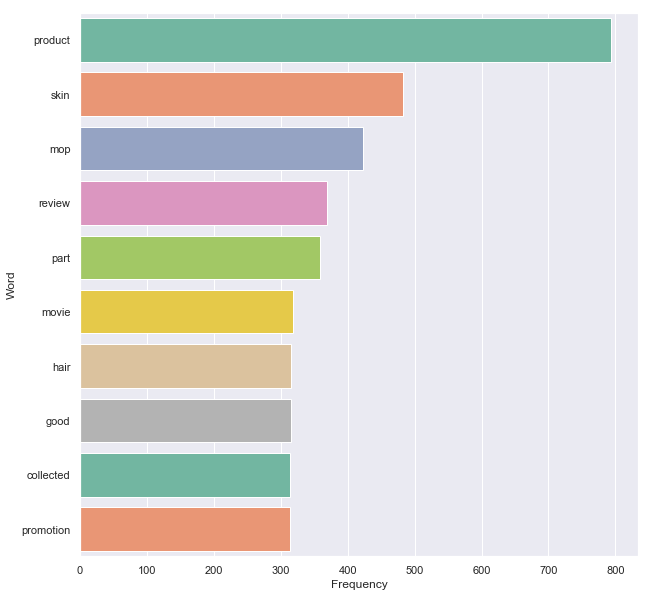

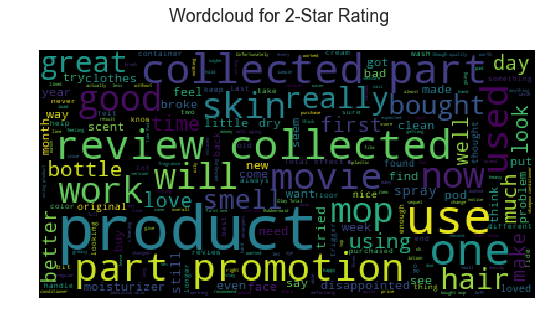

In [38]:
word_freq(df_2)
wc(df_2, 'black', 'Wordcloud for 2-Star Rating')

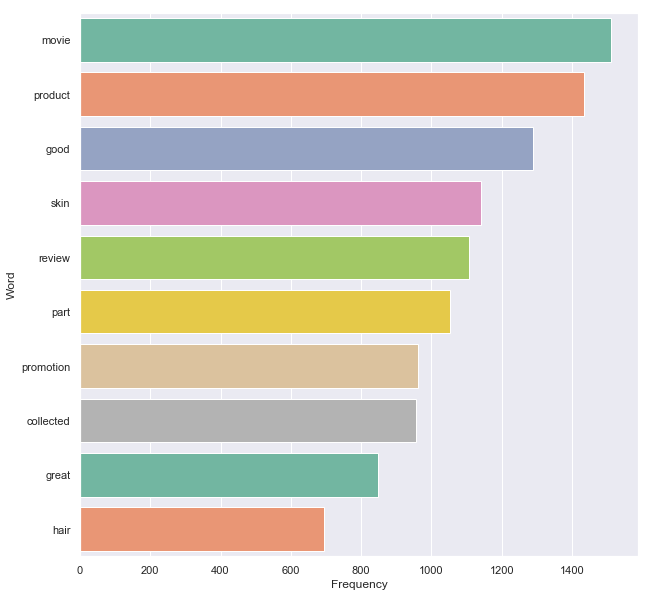

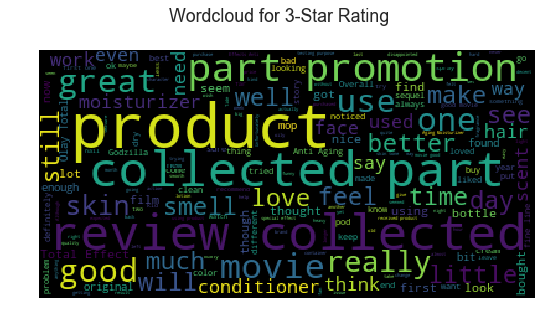

In [39]:
word_freq(df_3)
wc(df_3, 'black', 'Wordcloud for 3-Star Rating')

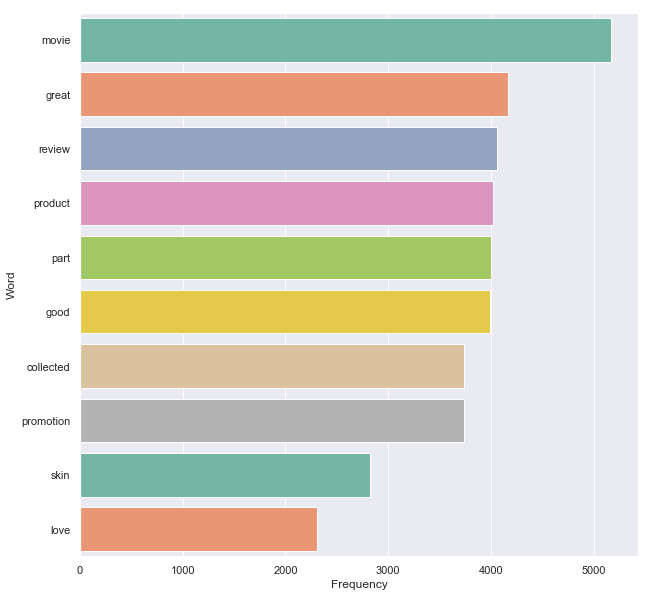

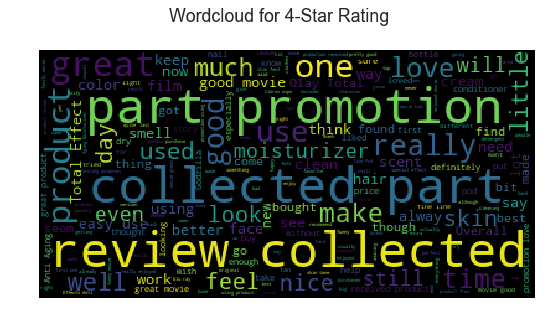

In [40]:
word_freq(df_4)
wc(df_4, 'black', 'Wordcloud for 4-Star Rating')

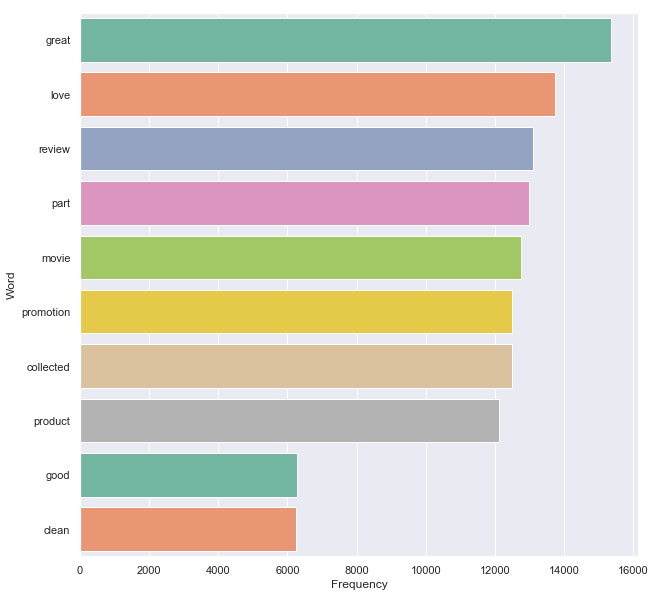

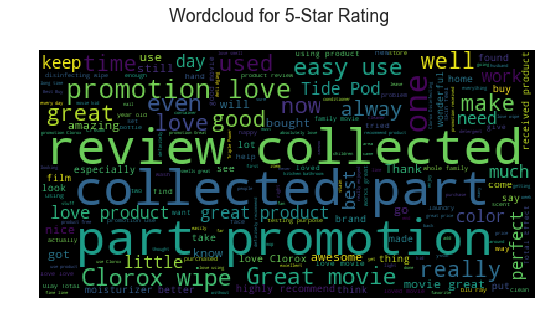

In [41]:
word_freq(df_5)
wc(df_5, 'black', 'Wordcloud for 5-Star Rating')

### Now we will make TF-IDF vectors for our reviews. If you are not familiar with TF-IDF vectorizer, please read https://www.analyticsvidhya.com/blog/2017/06/word-embeddings-count-word2veec/. And for our classifiers, we will use Random Forest and XGboost.

In [42]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

all_text = df['reviews.text']
train_text = df['reviews.text']
y = df['reviews.rating']

In [43]:
word_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'word',
                                  token_pattern =r'\w{1,}',
                                  stop_words = 'english',
                                  ngram_range = (1, 1),
                                  max_features = 10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)

In [44]:
char_vectorizer = TfidfVectorizer(sublinear_tf = True,
                                  strip_accents = 'unicode',
                                  analyzer = 'char',
                                  stop_words = 'english',
                                  ngram_range = (2, 6),
                                  max_features = 50000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)
train_features = hstack([train_char_features, train_word_features])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [47]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
rf_preds = classifier.predict(X_test)

C:\Users\Richard Cheung\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [50]:
from sklearn.metrics import accuracy_score

rf_accuracy = accuracy_score(rf_preds, y_test)
print("Random Forest Model accuracy: ", rf_accuracy)

Random Forest Model accuracy:  0.70698962587429


### Random Forest model scores 70.68%. Not Bad! Now let's see how XGboost performs.

In [51]:
import xgboost as xgb

In [52]:
xgb = xgb.XGBClassifier()

In [53]:
xgb.fit(X_train,
        y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [55]:
xgb_preds = xgb.predict(X_test)
xgb_accuracy = accuracy_score(xgb_preds, y_test)
print("XGBoost Model accuracy: ", xgb_accuracy)

XGBoost Model accuracy:  0.6983992864854716


C:\Users\Richard Cheung\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### XGBoost model fell short with score of 69.83%. Okay! This will conclude my project. Our main goal is to focus on natural language processing. We filtered out the unnecessary stopwords and left the words that are more meaningful to prediction. You are welcome to play around with parameter settings of the models and see if you can produce a better result or even try to apply deep learning. Thank you!